In [1]:
import os

# Define the correct path
base_dir = os.path.expanduser("~/Downloads/aifs-fruits")
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Verify the directories exist
print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))

# Rest of your code (ImageDataGenerator, etc.) remains the same

Train directory exists: True
Test directory exists: True


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the correct path
base_dir = os.path.expanduser("~/Downloads/aifs-fruits")
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Verify the directories exist (already confirmed)
print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))

# Set image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Only rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

2025-05-04 10:42:12.750235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train directory exists: True
Test directory exists: True
Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


/Users/skyzhao/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/skyzhao/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 425s 1s/step - accuracy: 0.5530 - loss: 1.3921 - val_accuracy: 0.8666 - val_loss: 0.3728
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8465 - loss: 0.4160 - val_accuracy: 0.8895 - val_loss: 0.3044
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.8789 - loss: 0.3326 - val_accuracy: 0.9066 - val_loss: 0.2739
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.8975 - loss: 0.2750 - val_accuracy: 0.9177 - val_loss: 0.2263
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - accuracy: 0.8952 - loss: 0.2798 - val_accuracy: 0.9059 - val_loss: 0.2784
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.9139 - loss: 0.2407 - val_accuracy: 0.9411 - val_loss: 0.1530
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9260 - loss: 0.2034 - val_accuracy: 0.9559 - val_loss: 0.1159
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.9279 - loss: 0.1839 - val_accu

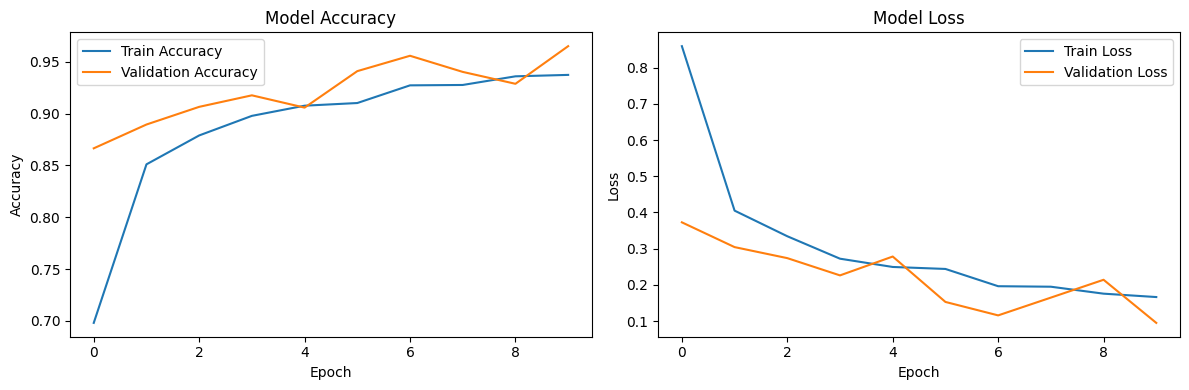

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 284ms/step


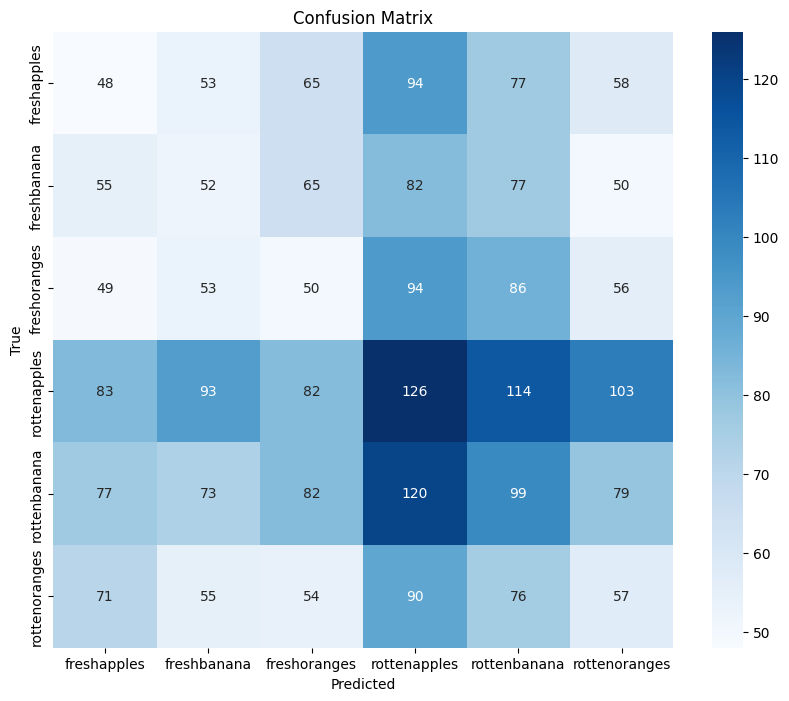

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
test_generator.reset()  # Reset generator to start from beginning
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


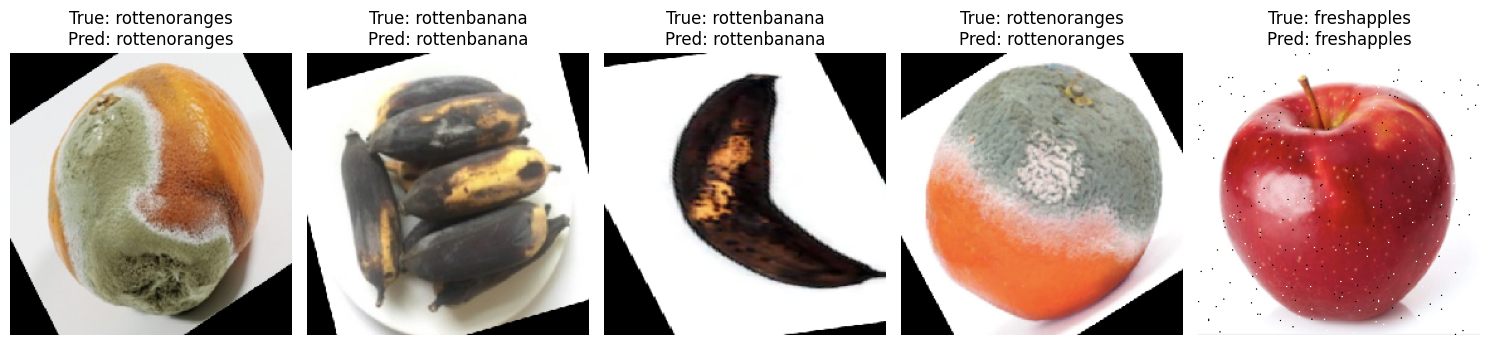

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test images and labels
test_generator.reset()
images, labels = next(test_generator)

# Get predictions for this batch
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Convert dict_keys to a list
class_labels = list(test_generator.class_indices.keys())

# Plot some samples
plt.figure(figsize=(15, 5))
for i in range(min(5, len(images))):  # Show up to 5 images
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f'True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


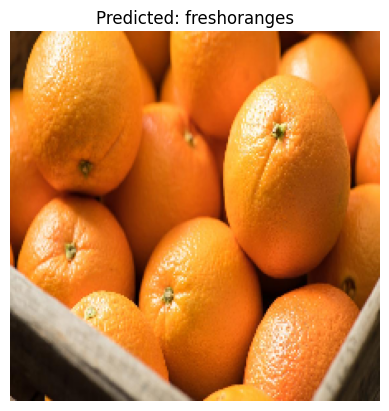

Predicted class: freshoranges
Prediction probabilities: [3.9731081e-16 7.0991627e-14 9.9976939e-01 3.5276246e-10 8.7023561e-18
 2.3056848e-04]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the image (update if necessary)
image_path = "oranges-in-a-box.jpg"  # Use this if in the same directory as the notebook
# Alternatively, use: image_path = "/Users/<YourUsername>/Downloads/oranges-in-a-box.jpg"

# Load and preprocess the image
IMG_SIZE = (224, 224)  # Same as used during training
img = load_img(image_path, target_size=IMG_SIZE)  # Load and resize image
img_array = img_to_array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Rescale pixel values (same as training)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get class labels
class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_label}")
print(f"Prediction probabilities: {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


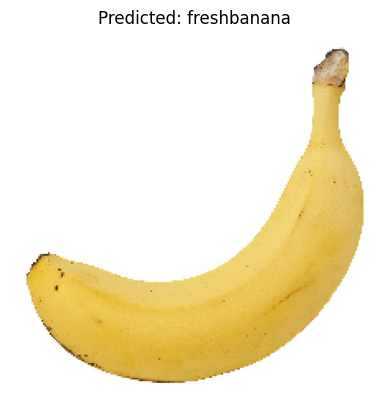

Predicted class: freshbanana
Prediction probabilities: [1.17812320e-08 9.99999642e-01 4.05283335e-10 2.37323022e-07
 3.54149385e-08 1.03230235e-07]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Define the full path to the image
image_path = os.path.expanduser("Banana-Single.jpg")  # Replace <YourUsername> with your username if needed

# Load and preprocess the image
IMG_SIZE = (224, 224)  # Same as used during training
img = load_img(image_path, target_size=IMG_SIZE)  # Load and resize image
img_array = img_to_array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Rescale pixel values (same as training)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get class labels
class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_label}")
print(f"Prediction probabilities: {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


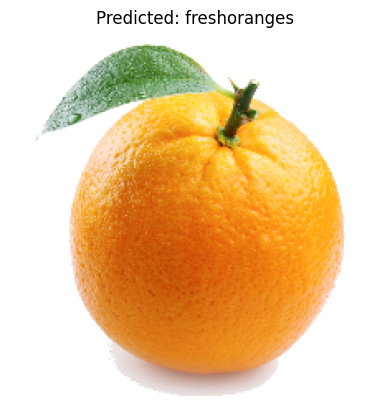

Predicted class: freshoranges
Prediction probabilities: [1.9730884e-05 2.6032598e-07 9.7934693e-01 3.2374851e-04 6.4014579e-16
 2.0309383e-02]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Define the full path to the image
image_path = os.path.expanduser("orange.jpg")  # Replace <YourUsername> with your username if needed

# Load and preprocess the image
IMG_SIZE = (224, 224)  # Same as used during training
img = load_img(image_path, target_size=IMG_SIZE)  # Load and resize image
img_array = img_to_array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Rescale pixel values (same as training)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get class labels
class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_label}")
print(f"Prediction probabilities: {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


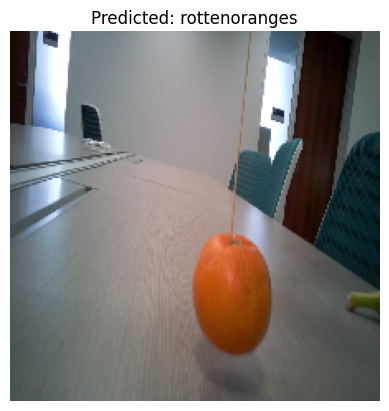

Predicted class: rottenoranges
Prediction probabilities: [6.4130290e-06 1.2915392e-04 9.3143352e-04 2.8753597e-03 1.0999262e-02
 9.8505831e-01]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Define the full path to the image
image_path = os.path.expanduser("image1.jpeg")  # Replace <YourUsername> with your username if needed

# Load and preprocess the image
IMG_SIZE = (224, 224)  # Same as used during training
img = load_img(image_path, target_size=IMG_SIZE)  # Load and resize image
img_array = img_to_array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Rescale pixel values (same as training)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get class labels
class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_label}")
print(f"Prediction probabilities: {prediction[0]}")